# **City of Chicago Traffic Crashes**

<div style="width: 2000px; overflow: hidden;">
  <header style="height: 5in; display: flex; justify-content: center; align-items: center;">
    <img src="..\chicago2.png" alt="Chicago skyline" style="height: 5in; width: 100%; object-fit: cover;"/>
  </header>
</div>


# **1. Business Understanding**

# **2. Data Understanding**

### **a) Imported relevant modules**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### **b) Loading the dataset**

In [2]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Now you can read the CSV file
df = pd.read_csv('/content/drive/My Drive/Traffic_Crashes_-_Crashes_20241007.csv')  # Updated path
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


### **c) Stratifed Random Sampling**

In [3]:
from sklearn.model_selection import train_test_split

# Assuming 'CRASH_TYPE' is the column to stratify by
data, out_of_sample_data = train_test_split(df, test_size=0.5, stratify=df['CRASH_TYPE'], random_state=42)

# Check the shape
print('Sampled Data Shape: ', data.shape)
print('Out of Sample Data Shape: ', out_of_sample_data.shape)

Sampled Data Shape:  (440198, 48)
Out of Sample Data Shape:  (440199, 48)


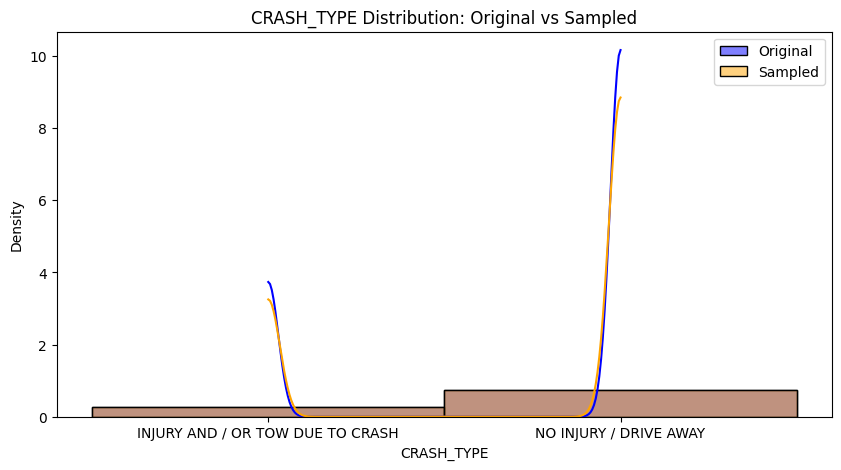

In [4]:
# Compare the distribution of a key feature like 'CRASH_TYPE'
plt.figure(figsize=(10, 5))

# Original dataset
sns.histplot(df['CRASH_TYPE'], color='blue', label='Original', stat='density', kde=True)

# Sampled dataset
sns.histplot(data['CRASH_TYPE'], color='orange', label='Sampled', stat='density', kde=True)

plt.legend()
plt.title('CRASH_TYPE Distribution: Original vs Sampled')
plt.show()


Based on the chart, the two distributions look very similar, which is a good indication that the stratified sampling has successfully preserved the overall distribution of the original dataset. This close alignment means the sample is representative of the original data, which is exactly what we aim for with stratified sampling.

### **d) Data Shape**

In [5]:
print('Our data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Our data has 440198 rows and 48 columns


### **e) Data Description**

In [7]:
data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,440198.000000,99211.000000,440198.000000,440196.000000,440198.000000,439225.000000,439225.000000,439225.000000,439225.000000,439225.000000,439225.000000,439225.0,440198.000000,440198.000000,440198.000000,437100.000000,437100.000000
mean,28.417401,7.787675,3686.158899,1244.141641,2.035261,0.193115,0.001157,0.020129,0.108500,0.063330,2.001969,0.0,13.201350,4.120618,6.640753,41.854585,-87.672620
std,6.128995,1177.411499,2839.345543,704.842397,0.452966,0.569814,0.037126,0.167704,0.424578,0.321306,1.153522,0.0,5.571388,1.983092,3.365347,0.362846,0.740714
min,0.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.934014
25%,30.000000,2.000000,1253.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783180,-87.721643
50%,30.000000,2.000000,3200.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874840,-87.674176
75%,30.000000,4.000000,5559.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.924442,-87.633481
max,99.000000,299679.000000,13799.000000,6100.000000,18.000000,21.000000,3.000000,10.000000,21.000000,11.000000,48.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


Our data seems to prescribe conditions surrounding a crash as well as the crash's outcome.

The columns include:
1. CRASH_RECORD_ID: Unique ID for each crash, used to link to related datasets.
2. CRASH_DATE_EST_I: Estimated crash date if reported later.
3. CRASH_DATE: Date and time of the crash.
4. POSTED_SPEED_LIMIT: Speed limit at the crash location.
5. TRAFFIC_CONTROL_DEVICE: Traffic control device present.
6. DEVICE_CONDITION: Condition of the traffic control device.
7. WEATHER_CONDITION: Weather at the time of the crash.
8. LIGHTING_CONDITION: Lighting at the time of the crash.
9. FIRST_CRASH_TYPE: Type of first collision.
10. TRAFFICWAY_TYPE: Type of trafficway.
11. LANE_CNT: Number of through lanes.
12. ALIGNMENT: Street alignment.
13. ROADWAY_SURFACE_COND: Road surface condition.
14. ROAD_DEFECT: Road defects.
15. REPORT_TYPE: Type of report (at scene, at desk, amended).
16. **CRASH_TYPE: Severity classification of the crash.**
17. INTERSECTION_RELATED_I: Whether an intersection played a role.
18. NOT_RIGHT_OF_WAY_I: Whether the crash occurred outside the public right-of-way.
19. HIT_AND_RUN_I: Whether it was a hit-and-run.
20. DAMAGE: Estimated damage.
21. DATE_POLICE_NOTIFIED: Date police were notified.
22. PRIM_CONTRIBUTORY_CAUSE: Primary cause of the crash.
23. SEC_CONTRIBUTORY_CAUSE: Secondary cause of the crash.
24. STREET_NO: Street address number.
25. STREET_DIRECTION: Street address direction.
26. STREET_NAME: Street address name.
27. BEAT_OF_OCCURRENCE: Chicago Police Department Beat ID.
28. PHOTOS_TAKEN_I: Whether photos were taken.
29. STATEMENTS_TAKEN_I: Whether statements were taken.
30. DOORING_I: Whether it involved dooring.
31. WORK_ZONE_I: Whether it occurred in a work zone.
32. WORK_ZONE_TYPE: Type of work zone.
33. WORKERS_PRESENT_I: Whether workers were present.
34. NUM_UNITS: Number of units involved.
35. MOST_SEVERE_INJURY: Most severe injury sustained1.
36. INJURIES_TOTAL: Total number of injuries.
37. NJURIES_FATAL: Number of fatal injuries.
38. INJURIES_INCAPACITATING: Number of incapacitating injuries.
39. INJURIES_NON_INCAPACITATING: Number of non-incapacitating injuries.
40. INJURIES_REPORTED_NOT_EVIDENT: Number of reported but not evident injuries.
41. INJURIES_NO_INDICATION: Number of no indication of injuries.
42. INJURIES_UNKNOWN: Number of unknown injuries.
43. CRASH_HOUR: Hour of the crash.
44. CRASH_DAY_OF_WEEK: Day of the week of the crash.
45. CRASH_MONTH: Month of the crash.
46. LATITUDE: Latitude of the crash location.
47. LONGITUDE: Longitude of the crash location.
48. LOCATION: Geographic location of the crash.

**Our Target Variable is CRASH TYPE as it aligns best with our objective of predicting Crash Severity given the column descriptions**

### **f) Duplicates**

In [8]:
data.duplicated().sum()

0

There are no duplicates in our dataset

Our dataset is quite large with several columns that seem to contain similar information. Below we inspect datatypes

### **g) Datatypes**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440198 entries, 495307 to 484789
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                440198 non-null  object 
 1   CRASH_DATE_EST_I               32640 non-null   object 
 2   CRASH_DATE                     440198 non-null  object 
 3   POSTED_SPEED_LIMIT             440198 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         440198 non-null  object 
 5   DEVICE_CONDITION               440198 non-null  object 
 6   WEATHER_CONDITION              440198 non-null  object 
 7   LIGHTING_CONDITION             440198 non-null  object 
 8   FIRST_CRASH_TYPE               440198 non-null  object 
 9   TRAFFICWAY_TYPE                440198 non-null  object 
 10  LANE_CNT                       99211 non-null   float64
 11  ALIGNMENT                      440198 non-null  object 
 12  ROADWAY_SURFACE_COND          

Our dataset is quite large with several columns that seem to contain similar information.



Below we drop some columns that have limited useful information given our overall objective. First, we will combine the street information to replace our location column which has GPS coordinates


In [10]:
data['LOCATION'] = data['STREET_NO'].astype(str) + ' ' + data['STREET_DIRECTION'] + ' ' + data['STREET_NAME']
data['LOCATION'].head()

,LOCATION
495307,4437 S CICERO AVE
269890,11500 S MICHIGAN AVE
205916,4328 W HIRSCH ST
399022,4837 S MICHIGAN AVE
704592,3500 W 71ST ST


In [11]:
columns_to_drop = ['CRASH_RECORD_ID','CRASH_DATE_EST_I', 'CRASH_DATE','REPORT_TYPE', 'TRAFFIC_CONTROL_DEVICE',
    'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','STREET_NO','STREET_DIRECTION','STREET_NAME','DATE_POLICE_NOTIFIED',
    'BEAT_OF_OCCURRENCE','LANE_CNT','LATITUDE', 'LONGITUDE','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN']

relevant_data = data.drop(columns = columns_to_drop, axis=1)
relevant_data.head()

,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
495307,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,7,4437 S CICERO AVE
269890,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,4,11500 S MICHIGAN AVE
205916,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,19,7,8,4328 W HIRSCH ST
399022,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,12,3,3,4837 S MICHIGAN AVE
704592,35,FUNCTIONING PROPERLY,CLEAR,DARKNESS,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1,1,10,3500 W 71ST ST


### **h) Missing Values**

Next, we will look at missing data by column percentage.

In [12]:
relevant_data.isna().sum()/data.shape[0]*100

,0
POSTED_SPEED_LIMIT,0.000000
DEVICE_CONDITION,0.000000
WEATHER_CONDITION,0.000000
LIGHTING_CONDITION,0.000000
FIRST_CRASH_TYPE,0.000000
TRAFFICWAY_TYPE,0.000000
ALIGNMENT,0.000000
ROADWAY_SURFACE_COND,0.000000
ROAD_DEFECT,0.000000
CRASH_TYPE,0.000000


In [13]:
print([col for col in relevant_data.columns
    if relevant_data[col].isna().sum()/relevant_data.shape[0]*100 > 50])

['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']


From a review of the data, we need to distinguish between missing values where this indicates 'no' or 'negative' from situations with actual missing data.

Based on the most affected columns:

- INTERSECTION_RELATED_I - missing value seem to equal N (no).
- HIT_AND_RUN_I - missing value seem to equal N (no).
- NOT_RIGHT_OF_WAY_I - missing value seem to equal N (no).
- WORKZONE_I - missing value seem to equal N (no).
- WORK_ZONE_TYPE -- missing value seem to equal not a work zone.
- WORKERS_PRESENT_I- missing value seem to equal N (no).

Below we deal with missing values for these columns

In [14]:
columns_to_fill_with_N = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
    'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']  #columns with many missing values which should actually be N

# Fill the selected columns with 'N'
relevant_data[columns_to_fill_with_N] = relevant_data[columns_to_fill_with_N].fillna('N') #fill the columns with N

# Fill 'WORK_ZONE_TYPE' with 'Other'
relevant_data['WORK_ZONE_TYPE'] = relevant_data['WORK_ZONE_TYPE'].fillna('Other') #fill this column with Other
relevant_data.head()


,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
495307,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,7,4437 S CICERO AVE
269890,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,4,11500 S MICHIGAN AVE
205916,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,19,7,8,4328 W HIRSCH ST
399022,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,12,3,3,4837 S MICHIGAN AVE
704592,35,FUNCTIONING PROPERLY,CLEAR,DARKNESS,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1,1,10,3500 W 71ST ST


In [15]:
relevant_data.isna().sum()

,0
POSTED_SPEED_LIMIT,0
DEVICE_CONDITION,0
WEATHER_CONDITION,0
LIGHTING_CONDITION,0
FIRST_CRASH_TYPE,0
TRAFFICWAY_TYPE,0
ALIGNMENT,0
ROADWAY_SURFACE_COND,0
ROAD_DEFECT,0
CRASH_TYPE,0


We can drop the remaining columns with missing values as their number is small and unlikely to affect the overall data distribution materially

In [16]:
relevant_data.dropna(inplace=True)
relevant_data.isna().sum().sum()

0

### **i) Variable Types**

In [17]:
# Separate categorical columns
categorical_columns = relevant_data.select_dtypes(include=['object']).columns.tolist()

# Separate continuous (numerical) columns
continuous_columns = relevant_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the separated columns
print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 20 categorical columns and 9 continuous columns


# **3. EDA & Data Preparation**

### **a) Basic Descriptive Statistics**

- **Continuous Columns:** We will get an overview of the distribution, central tendency, and spread

In [18]:
relevant_data[continuous_columns].describe()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
count,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000,439217.000000
mean,28.424116,2.036164,0.193119,0.001157,0.020129,0.108502,13.205746,4.121147,6.640542
std,6.122032,0.451592,0.569819,0.037127,0.167706,0.424581,5.566176,1.982705,3.365398
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,4.000000
50%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,7.000000
75%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,17.000000,6.000000,9.000000
max,99.000000,18.000000,21.000000,3.000000,10.000000,21.000000,23.000000,7.000000,12.000000


Our continuous data seems to have different scales across different features. Hence we may need to scale it

- **Categorical Columns:** We will get an overview of the distribution in each categorical column

In [19]:
relevant_data[categorical_columns].describe()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY,LOCATION
count,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217,439217
unique,8,12,6,18,20,6,7,7,2,2,2,2,3,40,40,2,5,2,5,211249
top,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,N,N,N,NO INDICATION OF INJURY,10000 W OHARE ST
freq,251204,345632,282825,101663,189346,428800,324958,350446,321339,342820,421182,307401,275548,171422,180661,437331,437331,438661,377551,698


Some of our categorical features have a lot of categories. Hence we may need to use **target encoding** to deal with high cardinality.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with fatalities, the encoding will reflect that association. Target encoding should not alter the shape of our data.

### **c) Visualizations**

We will use visualizations to help display the relationships and patterns in our data intuitively.

- **Distribution of continuous features:**

**1) Histograms**

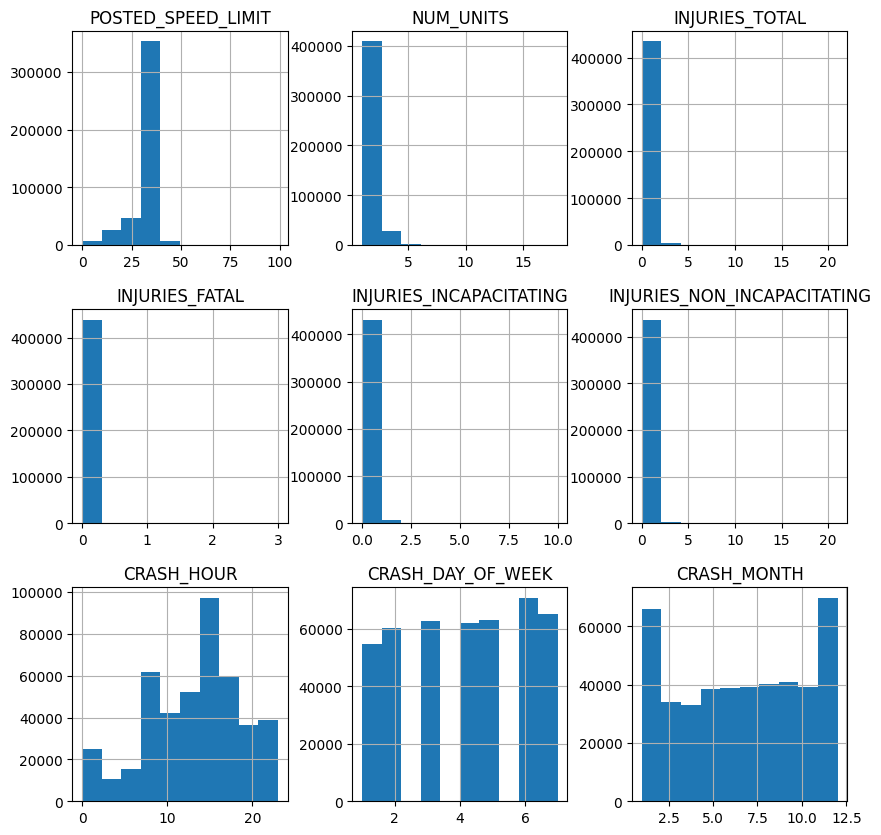

In [20]:
import matplotlib.pyplot as plt
relevant_data[continuous_columns].hist(figsize=(10, 10), bins=10) #plot histograms
plt.show()


Although we currently classify 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', as continuous features, their distributions imply that they represent discrete time periods rather than a continuous range. Each hour, day, and month is a distinct category which may have unique traffic patterns. We will convert these features to categorical

In [35]:
time_col = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']
relevant_data[time_col] = relevant_data[time_col].apply(lambda x: x.astype('object'))
categorical_columns = relevant_data.select_dtypes(include=['object']).columns.tolist()

if time_col in continuous_columns:
  [continuous_columns.remove(col) for col in time_col]
  [categorical_columns.append(col for col in time_col)]
else:
  print('Time columns already removed')

print(f"We now have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

Time columns already removed
We now have 23 categorical columns and 6 continuous columns


We can also visualize our continuous columns using boxplots to check for outliers

**2) Boxplots**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

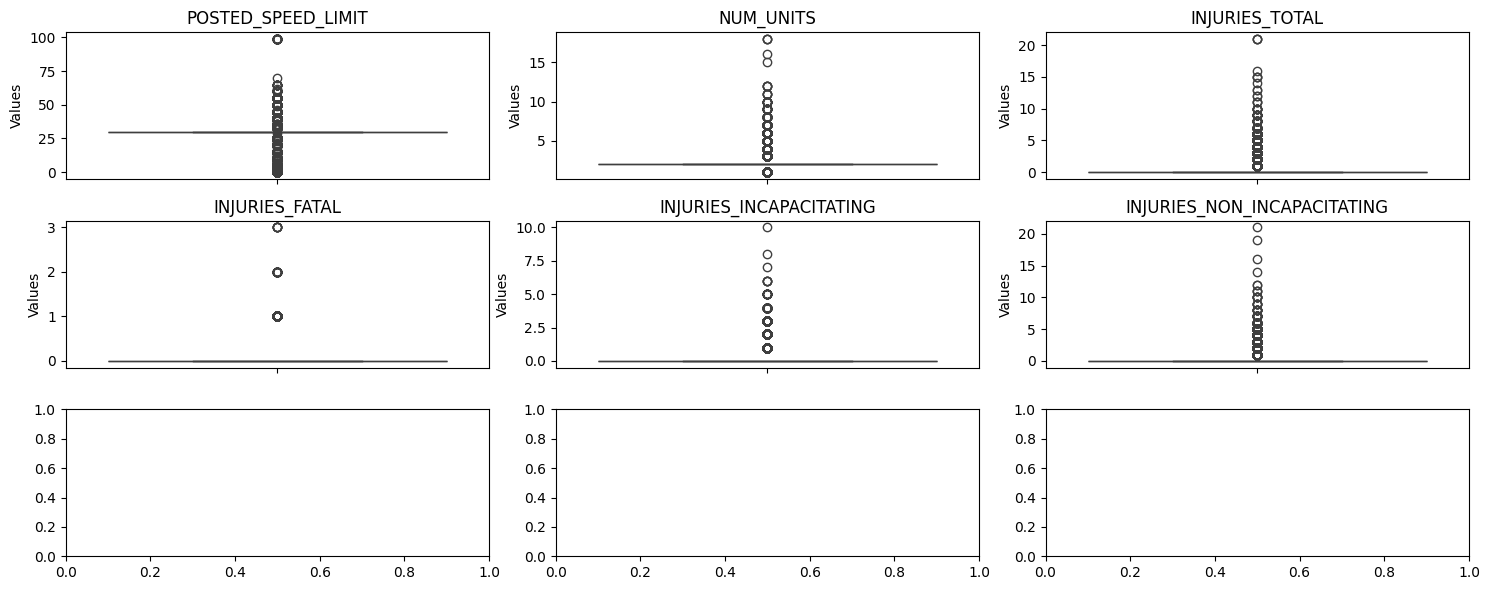

In [36]:
# Create a grid of subplots with 2 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 6))

# Iterate over the continuous columns and plot each one in a separate subplot
for i, col in enumerate(continuous_columns):
    # Get the appropriate subplot
    ax = axes[i // 3, i % 3]

    sns.boxplot(y=relevant_data[col], ax=ax)

    # Set the title of the subplot
    ax.set_title(col)

    # Set labels for y-axis
    ax.set_ylabel("Values")

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Looking at the boxplots, our continuous columns appear concentrated in certain values likely due to the nature of the crash data. It seems like there might be a lot of zero values which might give the appearance of categories but the features are actually continuous.

- **POSTED_SPEED_LIMIT:** This is continuous, but there might be common values (e.g., 30, 40 mph) that make it appear categorical.
- **NUM_UNITS:** The number of units (vehicles, people) involved in a crash. This is likely continuous (discrete, but not categorical).
- **INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING:** These are continuous as they count the number of injuries, though they might have many zeroes.

Further, our data does not seem to have any outliers.

**3) Bar Plots**

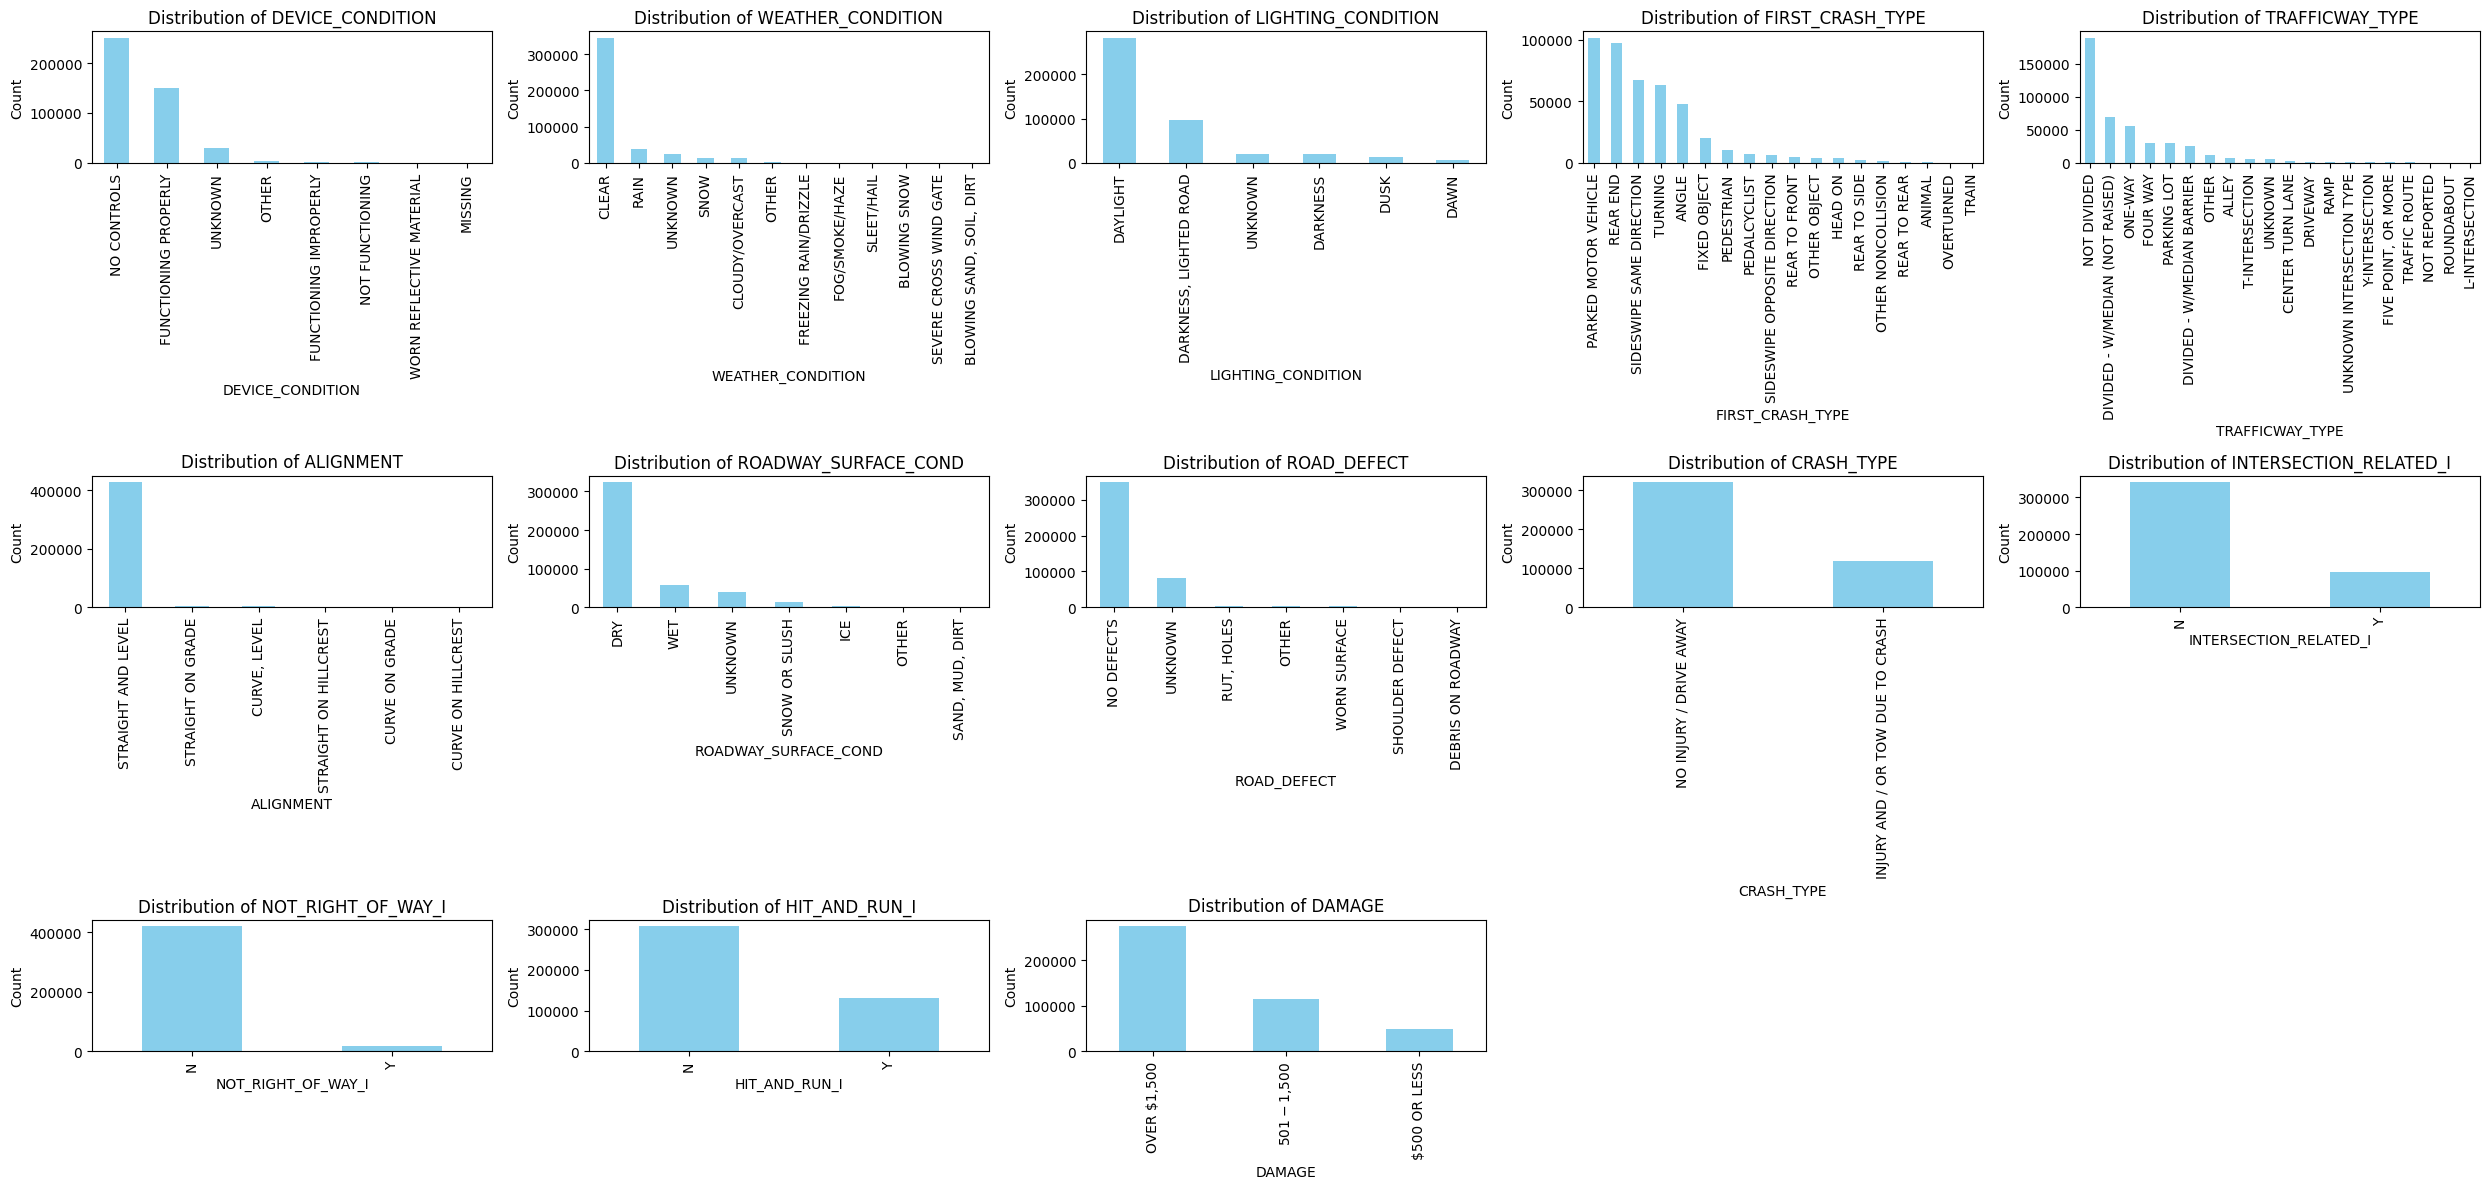

In [37]:
#we will remove location data as it is hard to represent in the plot
#categorical_columns.remove('LOCATION')
# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 5
n_rows = (len(categorical_columns[:13]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 12)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[:13]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()

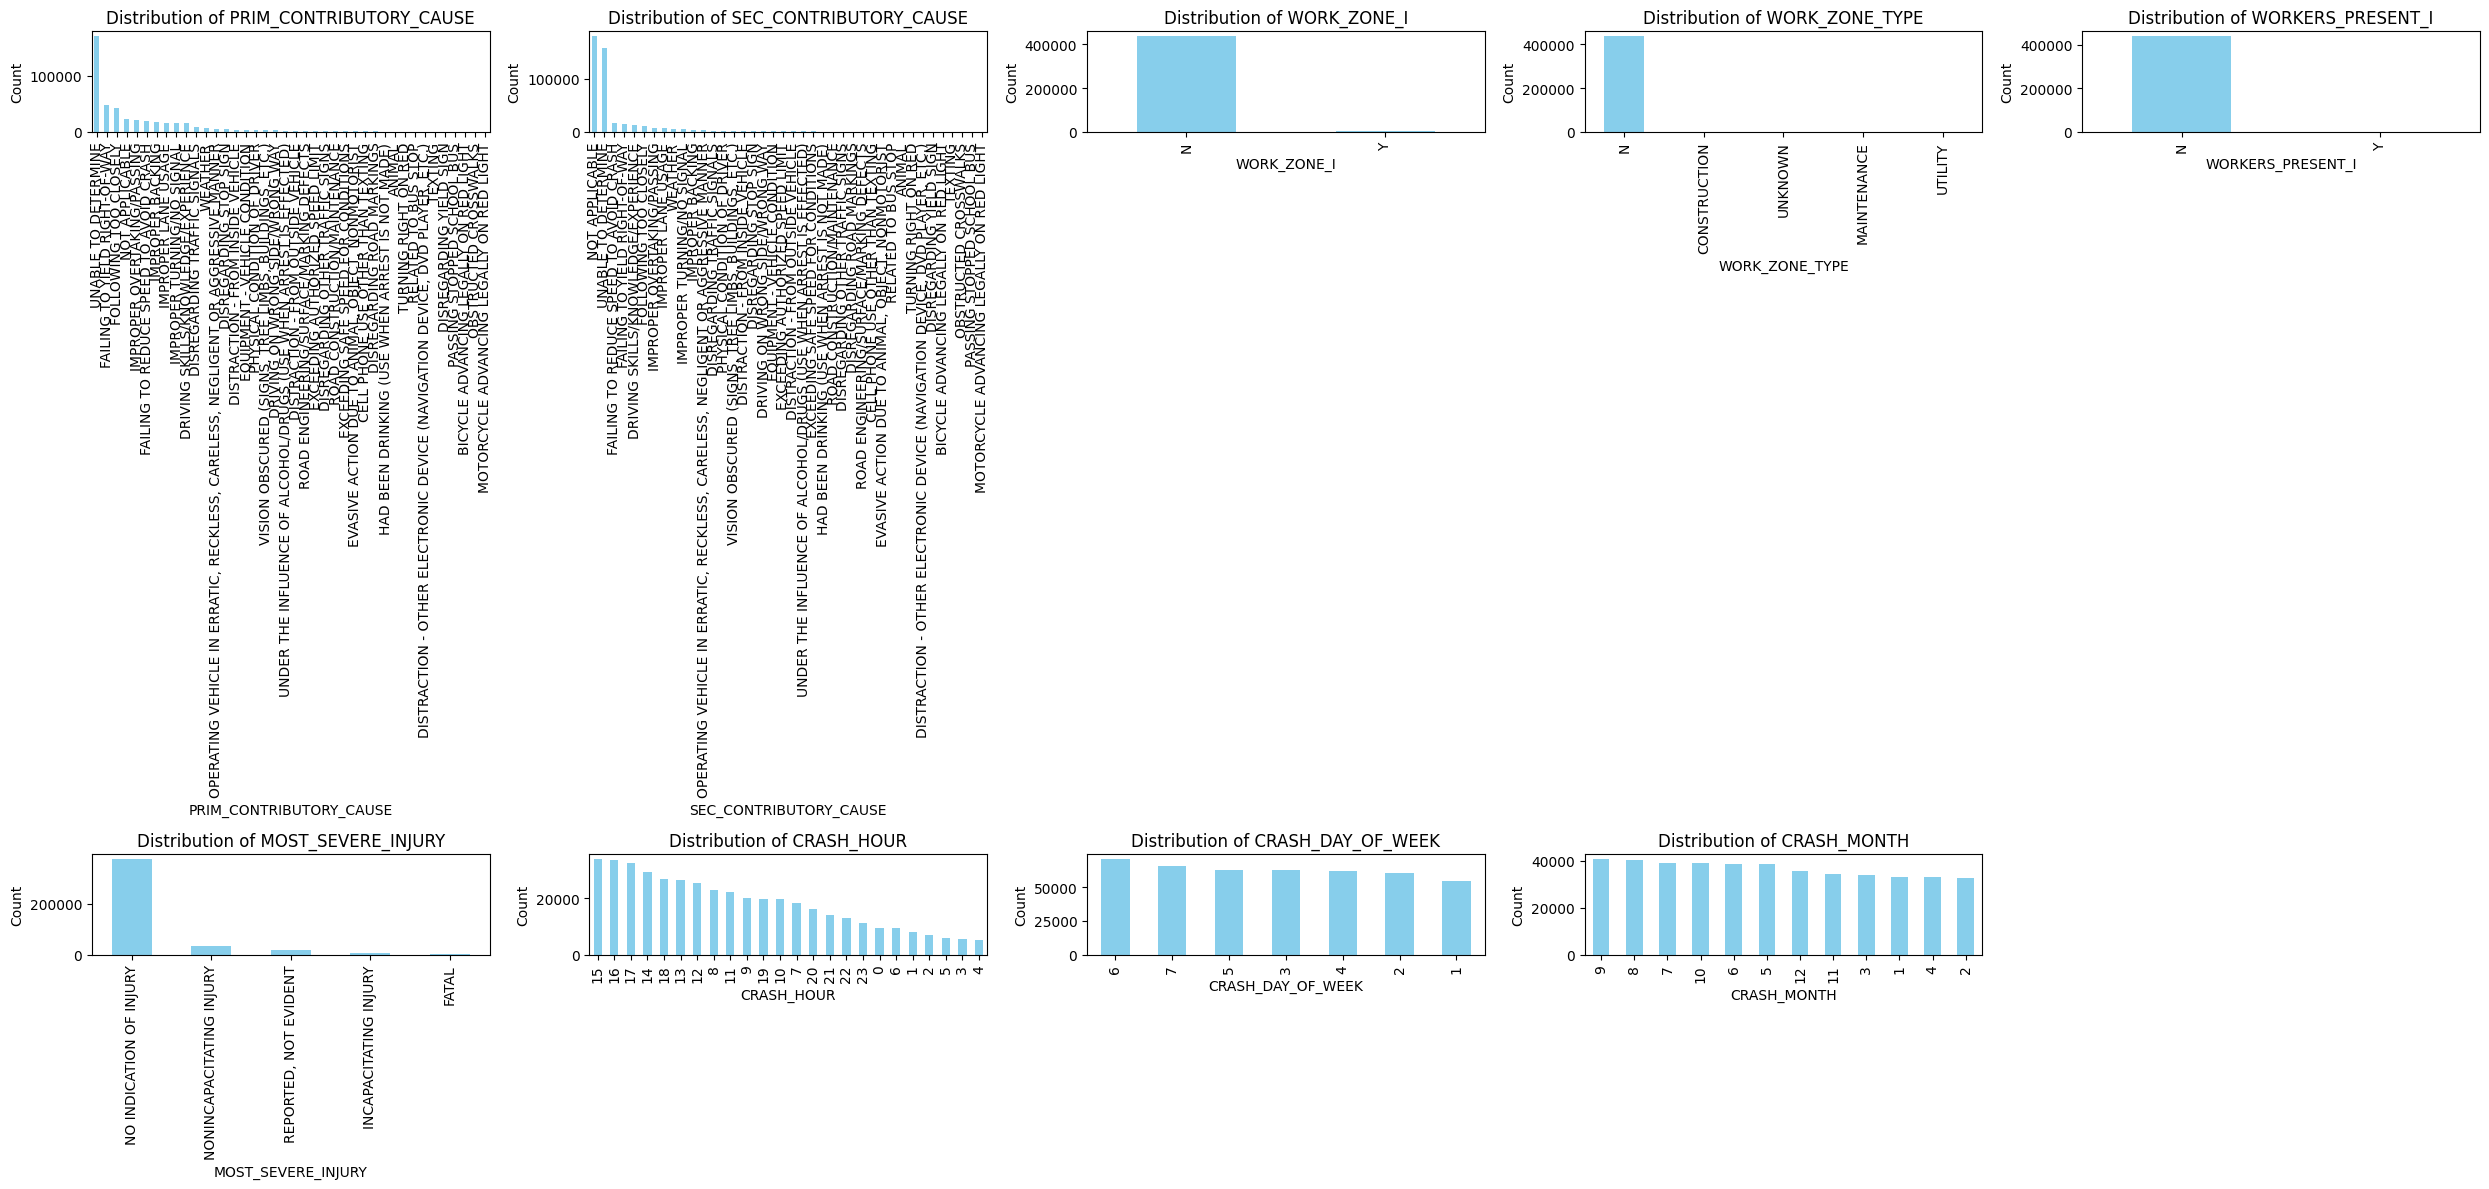

We now have 22 categorical columns and 6 continuous columns


In [38]:
#we will remove location data as it is hard to represent in the plot
if 'LOCATION' in categorical_columns:
  categorical_columns.remove('LOCATION')
else:
  print('Location column already removed')

# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 5
n_rows = (len(categorical_columns[13:]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(n_rows, n_cols,figsize=(25, 12)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[13:]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()
print(f"We now have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

**Specific Feature/Target Variable Observations:**

- **Distribution of MOST_SEVERE_INJURIES:**

Our target variable shows significant class imbalance. There are no injuries in most accidents.

- **Relationship Between Features and Crash Type:**

Weather Condition: If the weather condition shows a significant difference in counts between crash types, it might imply that certain conditions lead to more severe crashes.

Lighting Condition: Similar to weather, if there are trends in lighting conditions correlating with specific crash types, this could highlight risk factors to consider in analysis.

Traffic Control Device: The presence or absence of certain devices could correlate with specific crash types, such as more accidents occurring at intersections without signals.

- **Injury Counts and Crash Severity:**

Features like INJURIES_TOTAL, INJURIES_FATAL, and INJURIES_INCAPACITATING should be closely examined against the CRASH_TYPE. Higher injury counts in certain crash types may suggest a higher severity or risk associated with those types.
If INJURIES_TOTAL has a significantly higher count for a particular CRASH_TYPE, it indicates that crashes of this type tend to be more severe, which could influence how you model severity.

- **Posted Speed Limit:**

If the POSTED_SPEED_LIMIT shows varying counts across crash types, it may imply that certain speed limits correlate with the likelihood or severity of specific crash types. For instance, higher speed limits might lead to more severe crashes.

- **NUM_UNITS:**

If NUM_UNITS (the number of vehicles involved) displays a significant relationship with certain crash types, it suggests that some types are more likely to involve multiple vehicles (e.g., collisions vs. single-vehicle crashes).
Feature Interaction:

- **Work Zones:**

Work zone-related crashes are relatively uncommon, but when they do occur, they're most often in construction zones.

- **Crash Contributory Causes:**

There's a wide variety of primary contributory causes for crashes. A few causes appear much more frequently than others, with the tallest bars representing the most common causes. Many causes have relatively low occurrence rates, as shown by the numerous short bars.The distribution for secondary causes is similar to the primary cause, with a few dominant causes and many less frequent ones. The overall counts seem lower than for primary causes, which is expected.

**General Observations:**

- **Highly Skewed Distributions:**

Several columns have highly skewed distributions with a single category dominating most of the data. For instance, in plots like the second and third from the top row, there is one bar much larger than the others. This indicates that most of the values for those features belong to a single category.

- **Sparse Representation:**

Some plots show that there are multiple categories, but many of these have very low representation (almost no bar height), suggesting these categories are relatively rare. A few plots show two or three dominant categories with sizable bars. These are features where a few categories have a significant share of data, while the rest have smaller frequencies. This can be seen in the plots from the third row.

- **Mix of Categoriscal and Binary Variables:**

The dataset seems to have a mix of categorical and binary variables related to crash circumstances.

 - **Potential for Feature Engineering:**

For features with many rare categories, you may want to consider combining the rare categories into an “Other” group or apply techniques such as target encoding or leave-one-out encoding if they are important for your model.
These findings suggest that certain columns may not provide much distinguishing information due to their imbalance, while others may have meaningful splits between a few key categories.

### **d) Correlation Analysis**

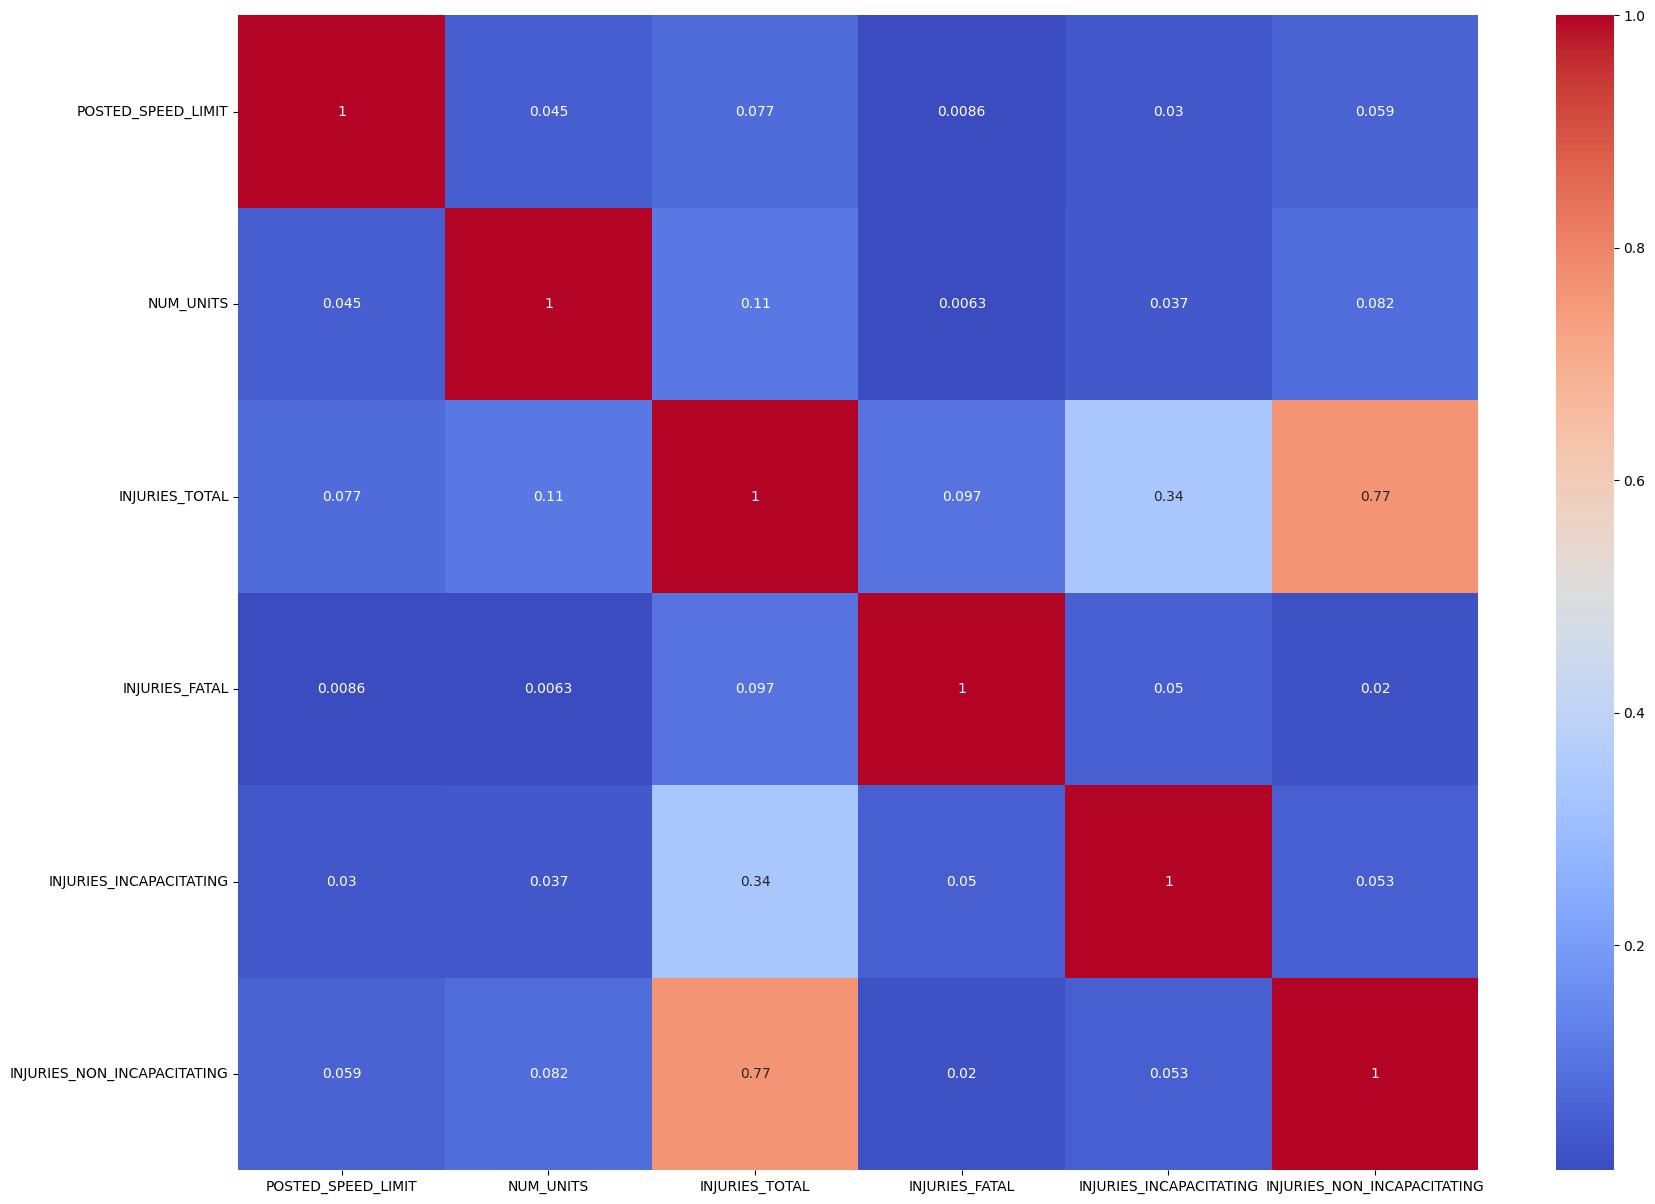

In [40]:

plt.subplots(figsize=(20,15))
sns.heatmap(relevant_data[continuous_columns].corr(),cmap="coolwarm",annot=True);

Our correlation analysis only includes numerical features with only INJURIES_TOTAL and INJURY_NON_INCAPACITATING having high correlation (77%) which is to be expected.

### **e) Encoding**

We will start by splitting our data into a training and test set before proceeding to avoid any data leakage

### **Train Test Split**

In [41]:
X=relevant_data.drop('DAMAGE', axis=1)
y=relevant_data['DAMAGE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (285491, 28)
X_test shape: (153726, 28)
y_train shape: (285491,)
y_test shape: (153726,)


In [42]:
print('Summary of Frequency Distribution in our Features\n')


high_cardinality_cols = [column for column in X_train.columns if X_train[column].nunique() > 7 and X_train[column].dtype == 'object' ] #high cardinality features
print('High Cardinality Cols:', high_cardinality_cols)

low_cardinality_cols = [column for column in X_train.columns if X_train[column].nunique() <= 7 and X_train[column].dtype == 'object' ] #low cardinality features
print('Low Cardinality Cols:', low_cardinality_cols)


Summary of Frequency Distribution in our Features

High Cardinality Cols: ['DEVICE_CONDITION', 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_MONTH', 'LOCATION']
Low Cardinality Cols: ['LIGHTING_CONDITION', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'MOST_SEVERE_INJURY', 'CRASH_DAY_OF_WEEK']


Summary of Frequency Distribution in our Dataset

High Cardinality Columns:
- DEVICE_CONDITION - 8 unique values
- WEATHER_CONDITION - 12 unique values
- FIRST_CRASH_TYPE - 18 unique values
- TRAFFICWAY_TYPE - 20 unique values
- PRIM_CONTRIBUTORY_CAUSE - 40 unique values
- SEC_CONTRIBUTORY_CAUSE - 40 unique values
- CRASH_HOUR - 24 unique values
- CRASH_MONTH - 12 unique values
- LOCATION -211249 unique values

Low Cardinality Columns:
- LIGHTING_CONDITION - 6 unique values
- ALIGNMENT - 6 unique values
- ROADWAY_SURFACE_COND - 7 unique values
- ROAD_DEFECT - 7 unique values
- CRASH_TYPE - 2 unique values
- INTERSECTION_RELATED_I - 2 unique values
- NOT_RIGHT_OF_WAY_I - 2 unique values
- HIT_AND_RUN_I - 2 unique values
- DAMAGE - 3 unique values
- WORK_ZONE_I - 2 unique values
- WORK_ZONE_TYPE - 5 unique values
- WORKERS_PRESENT_I - 2 unique values
- CRASH_DAY_OF_WEEK - 7 unique values



### **Label Encoding**

Our target 'MOST_SEVERE_INJURY' has 5 unique values whuch have a natural order so we will use label encoding for this.
Label encoding the target variable is crucial because many machine learning algorithms require numeric input. By converting the categorical target into numerical values, we enable algorithms  to interpret and process the target effectively. This step ensures the model can measure relationships between features and target classes accurately, improving the overall performance and interpretability of the model.

In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for the target
le = LabelEncoder()

# Reset the index of y_train and y_test
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Encode y_train and y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create new Pandas Series with the encoded values and the old indexes
y_train = pd.Series(y_train_encoded, index=y_train.index)
y_test = pd.Series(y_test_encoded, index=y_test.index)

y_train.unique()

array([1, 2, 0])

In [44]:
y_train.value_counts()

,count
2,179125
1,74243
0,32123


#### **Target Encoding**
We will use target encoding to deal with our high cardinality features.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with an outcome related to the values in our target (e.g., No INDICATION OF INJURY), the encoding will reflect that association. Target encoding should not alter the shape of our data

In [46]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [47]:
from category_encoders import TargetEncoder

#encode the high cardinality features
te = TargetEncoder(cols=high_cardinality_cols)
te.fit(X_train, y_train_encoded)
X_train_te = te.transform(X_train)
X_test_te = te.transform(X_test)

#assign the transform values into a dataframe
X_train_te_df = pd.DataFrame(X_train_te, columns=X_train[high_cardinality_cols].columns)
X_test_te_df = pd.DataFrame(X_test_te, columns=X_test[high_cardinality_cols].columns)

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(columns=high_cardinality_cols)
X_test = X_test.drop(columns=high_cardinality_cols)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of te df
X_train_te_df = X_train_te_df.reset_index(drop=True)
X_test_te_df = X_test_te_df.reset_index(drop=True)

#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_te_df], axis=1)
X_test = pd.concat([X_test, X_test_te_df], axis=1)

Below we do some tests to check the integrity of our data after target encoding it



In [48]:
X_train.head()

,POSTED_SPEED_LIMIT,LIGHTING_CONDITION,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,WORK_ZONE_I,...,CRASH_DAY_OF_WEEK,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_MONTH,LOCATION
0,30,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,N,...,6,1.499644,1.509902,1.467722,1.505291,1.415291,1.498835,1.708422,1.505977,1.447915
1,30,DAYLIGHT,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,Y,N,Y,N,...,1,1.539279,1.509902,1.726166,1.588907,1.576787,1.589209,1.485787,1.514226,1.578024
2,30,DAYLIGHT,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,N,...,3,1.499644,1.527063,1.507471,1.498728,1.492933,1.498835,1.514279,1.521589,1.578024
3,25,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,N,...,4,1.499644,1.507582,1.507471,1.521401,1.319877,1.503183,1.481855,1.522552,1.441869
4,30,DAYLIGHT,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,N,N,Y,N,...,6,1.539279,1.509902,1.461684,1.505291,1.456169,1.503183,1.483664,1.506930,1.282455


In [49]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (285491, 28)
X_test shape: (153726, 28)
y_train shape: (285491,)
y_test shape: (153726,)


### **One Hot Encoding**

One-hot encoding is essential for converting categorical features into a binary matrix representation, where each category is represented as a separate binary column. This process prevents the model from assuming any ordinal relationship between categorical values, which can be misleading when categories have no inherent order (e.g., weather conditions or traffic control devices). By applying one-hot encoding, we ensure that the model treats each category independently, improving its ability to capture the true relationships between features and the target.
We expect one hot encoding to change the shape of our data by increasing the number of features.

In [50]:
from sklearn.preprocessing import OneHotEncoder

#fit the ohe
ohe = OneHotEncoder(handle_unknown="ignore", drop="first")
ohe.fit(X_train[low_cardinality_cols])

#transform our train and test feature set
X_train_ohe = ohe.transform(X_train[low_cardinality_cols])
X_test_ohe = ohe.transform(X_test[low_cardinality_cols])

#assign the transform values into a dataframe
X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=ohe.get_feature_names_out(X_train[low_cardinality_cols].columns))
X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=ohe.get_feature_names_out(X_test[low_cardinality_cols].columns))

#drop the original low cardinality features from our train and test set
X_train = X_train.drop(low_cardinality_cols, axis=1)
X_test = X_test.drop(low_cardinality_cols, axis=1)

# reset index of Train and Test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

#reset index of ohe
X_train_ohe_df = X_train_ohe_df.reset_index(drop=True)
X_test_ohe_df = X_test_ohe_df.reset_index(drop=True)


#update train and test feature set with the encoded values
X_train = pd.concat([X_train, X_train_ohe_df], axis=1 )
X_test = pd.concat([X_test, X_test_ohe_df], axis=1)

X_train.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT",CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7
0,30,2,0.0,0.0,0.0,0.0,1.499644,1.509902,1.467722,1.505291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,30,2,0.0,0.0,0.0,0.0,1.539279,1.509902,1.726166,1.588907,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30,2,0.0,0.0,0.0,0.0,1.499644,1.527063,1.507471,1.498728,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,25,2,0.0,0.0,0.0,0.0,1.499644,1.507582,1.507471,1.521401,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,30,2,0.0,0.0,0.0,0.0,1.539279,1.509902,1.461684,1.505291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
X_test.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,DEVICE_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT",CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7
0,30,2,0.0,0.0,0.0,0.0,1.539279,1.509902,1.473367,1.521401,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30,2,0.0,0.0,0.0,0.0,1.499644,1.509902,1.461684,1.588907,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30,1,1.0,1.0,0.0,0.0,1.517914,1.509902,1.444363,1.588907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30,2,0.0,0.0,0.0,0.0,1.499644,1.509902,1.461684,1.521401,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,2,0.0,0.0,0.0,0.0,1.539279,1.509902,1.473367,1.498728,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
print('No. of rows in encoded data:', (X_train.shape[0]+X_test.shape[0]))
print('No. of rows in original data:', (relevant_data.shape[0]))
print(f'No of features in encoded data {X_train.shape[1]} in Train Set and {X_test.shape[1]} in test set:')
print('No. of features in original data:', (relevant_data.drop('MOST_SEVERE_INJURY', axis=1).shape[1]))

No. of rows in encoded data: 439217
No. of rows in original data: 439217
No of features in encoded data 57 in Train Set and 57 in test set:
No. of features in original data: 28


Our data looks ok.

Below, we run correlation analysis afresh after encoding our data as this will give us a better representation of the correlation our features have with the target variable since we have a numerical representation of our dataset.

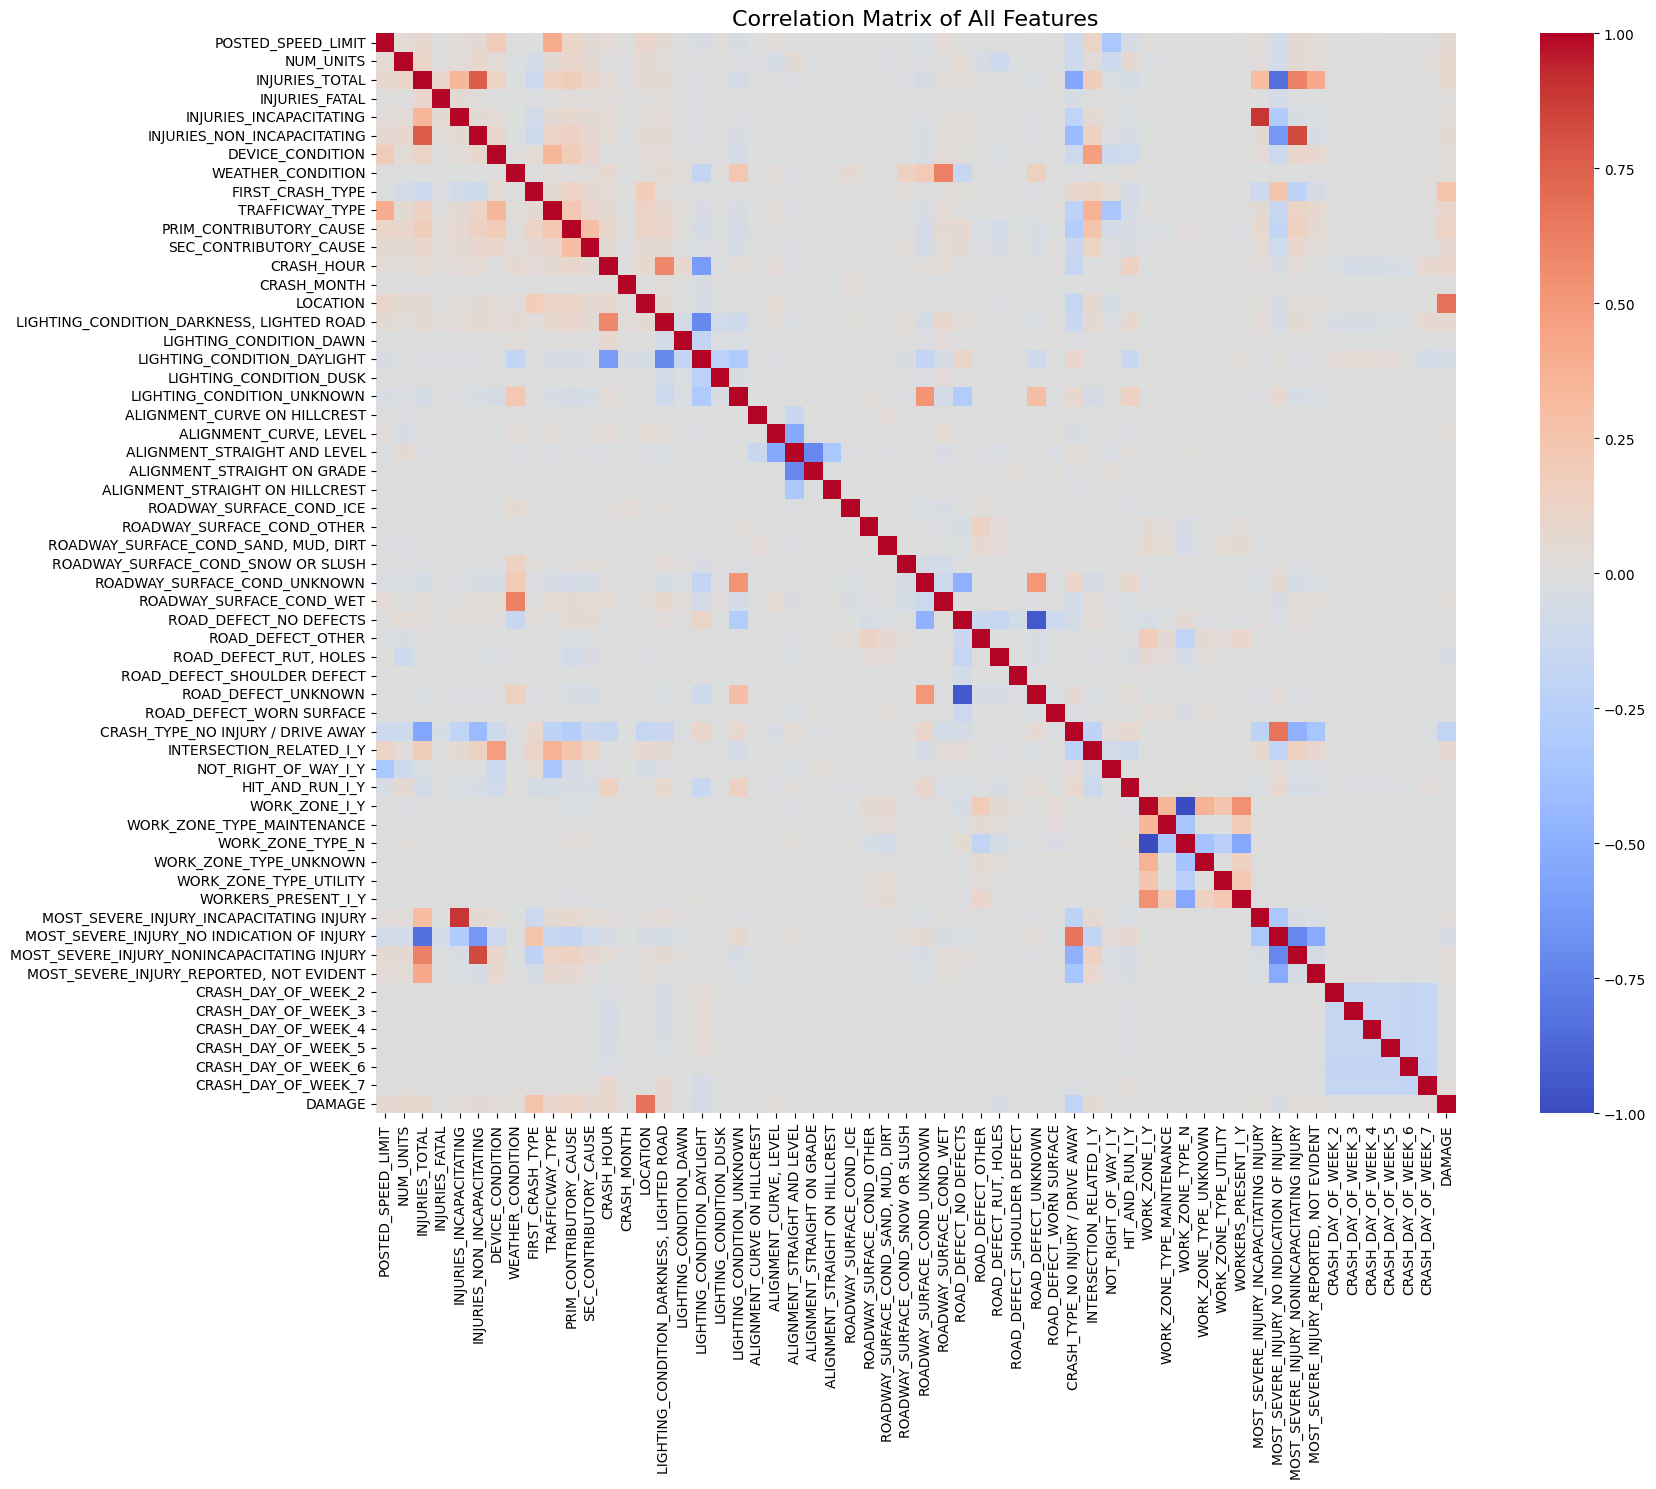

Highly correlated feature pairs:
MOST_SEVERE_INJURY_INCAPACITATING INJURY - INJURIES_INCAPACITATING: 0.89
INJURIES_INCAPACITATING - MOST_SEVERE_INJURY_INCAPACITATING INJURY: 0.89
INJURIES_NON_INCAPACITATING - MOST_SEVERE_INJURY_NONINCAPACITATING INJURY: 0.83
MOST_SEVERE_INJURY_NONINCAPACITATING INJURY - INJURIES_NON_INCAPACITATING: 0.83
INJURIES_TOTAL - INJURIES_NON_INCAPACITATING: 0.76
INJURIES_NON_INCAPACITATING - INJURIES_TOTAL: 0.76
LOCATION - DAMAGE: 0.67
DAMAGE - LOCATION: 0.67
MOST_SEVERE_INJURY_NO INDICATION OF INJURY - CRASH_TYPE_NO INJURY / DRIVE AWAY: 0.67
CRASH_TYPE_NO INJURY / DRIVE AWAY - MOST_SEVERE_INJURY_NO INDICATION OF INJURY: 0.67
WEATHER_CONDITION - ROADWAY_SURFACE_COND_WET: 0.61
ROADWAY_SURFACE_COND_WET - WEATHER_CONDITION: 0.61
MOST_SEVERE_INJURY_NONINCAPACITATING INJURY - INJURIES_TOTAL: 0.61
INJURIES_TOTAL - MOST_SEVERE_INJURY_NONINCAPACITATING INJURY: 0.61
LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD - CRASH_HOUR: 0.58
CRASH_HOUR - LIGHTING_CONDITION_DARKNESS, LI

In [53]:
def analyze_and_plot_correlations(df, threshold=0.5, target=None):
    # Compute correlation matrix
    corr_matrix = df.corr()

    # Plot heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of All Features', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Get high correlations
    high_corrs = corr_matrix.unstack()
    high_corrs = high_corrs[(abs(high_corrs) > threshold) & (abs(high_corrs) < 1.0)]
    high_corrs = high_corrs.sort_values(ascending=False).reset_index()
    high_corrs.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Print highly correlated feature pairs
    print("Highly correlated feature pairs:")
    for _, row in high_corrs.iterrows():
        print(f"{row['Feature 1']} - {row['Feature 2']}: {row['Correlation']:.2f}")

    # Focus on specific feature correlations if provided
    if target is not None:
        target_corrs = corr_matrix[target]
        target_corrs = target_corrs[(abs(target_corrs) > threshold) & (abs(target_corrs) < 1.0)]
        target_corrs = target_corrs.sort_values(key=abs, ascending=False)

        print(f"\nFeatures highly correlated with {target}:")
        for feat, corr in target_corrs.items():
            print(f"{feat}: {corr:.2f}")


X_train_plus_target = pd.concat([X_train, y_train.rename('DAMAGE')], axis=1) #add back y_train to X_train to perform correlation analysis

analyze_and_plot_correlations(X_train_plus_target, threshold=0.5, target='DAMAGE')


Our data is ready for modeling. We have several highly correlated features which is expected after One Hot Encoding. We will keep the unrelated features in mind when we are modeling to prevent the effects of multicollinearity.E.g. we may neeed to use Lasso or Ridge to handle multicollinearity by shrinking the coefficients of correlated variables or use Principal Component Analysis to transform the feature space into a smaller set of uncorrelated variable which will also help in reducing dimensionality.

Additionally, we have two features that are highly correlated to our target: LOCATION and INJURIES TOTAL. We should look out for the importance of these features when we do our modeling.

# 4. Modeling

In [54]:
#import necessary packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from keras import models, layers, optimizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

### **1) Baseline Model: Multinomial Naive Bayes Classifier**

In [55]:
model_NB = MultinomialNB() #initialize model

model_NB.fit(X_train, y_train) #fit model

y_pred = model_NB.predict(X_test) #make predictions on test set

accuracy_NB = accuracy_score(y_test, y_pred)
class_report_NB = classification_report(y_test,y_pred)

print(f'Accuracy: {accuracy_NB:.4f}')
print('Classification Report:')
print(class_report_NB)



Accuracy: 0.6254
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.00      0.00     17263
           1       0.35      0.02      0.03     40040
           2       0.63      0.99      0.77     96423

    accuracy                           0.63    153726
   macro avg       0.41      0.34      0.27    153726
weighted avg       0.51      0.63      0.49    153726



In [56]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model on the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)


Random Forest Accuracy: 0.5672
Confusion Matrix:
[[ 1873  5611  9779]
 [ 2012 14810 23218]
 [ 3449 22463 70511]]
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.11      0.15     17263
           1       0.35      0.37      0.36     40040
           2       0.68      0.73      0.71     96423

    accuracy                           0.57    153726
   macro avg       0.43      0.40      0.40    153726
weighted avg       0.55      0.57      0.55    153726



In [57]:
import xgboost as xgb

# Convert your data into DMatrix format, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(y.unique()),   # Number of classes
    'max_depth': 6,                 # Maximum depth of the tree
    'eta': 0.3,                     # Learning rate
    'subsample': 0.8,               # Subsample ratio
    'colsample_bytree': 0.8,        # Column sample ratio
    'seed': 42                      # Random seed
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print('Confusion Matrix:')
print(conf_matrix_xgb)
print('Classification Report:')
print(class_report_xgb)


XGBoost Accuracy: 0.5469
Confusion Matrix:
[[ 1643  7626  7994]
 [ 1648 18749 19643]
 [ 3163 29581 63679]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.10      0.14     17263
           1       0.34      0.47      0.39     40040
           2       0.70      0.66      0.68     96423

    accuracy                           0.55    153726
   macro avg       0.43      0.41      0.40    153726
weighted avg       0.55      0.55      0.54    153726



Num GPUs Available:  1
Epoch 1/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.7533 - loss: 0.6102 - val_accuracy: 0.7774 - val_loss: 0.5318
Epoch 2/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7755 - loss: 0.5452 - val_accuracy: 0.7801 - val_loss: 0.5236
Epoch 3/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7750 - loss: 0.5370 - val_accuracy: 0.7767 - val_loss: 0.5127
Epoch 4/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7774 - loss: 0.5206 - val_accuracy: 0.7810 - val_loss: 0.4941
Epoch 5/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7809 - loss: 0.5059 - val_accuracy: 0.7839 - val_loss: 0.4892
Epoch 6/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7812 - loss: 0.5004 - val_accuracy: 0.7814 - val_loss: 0.4798
Epoch 7/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7807 - loss: 0.4971 - val_accuracy: 0.7848 - val_loss: 0.4764
Epoch 8/20
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - acc

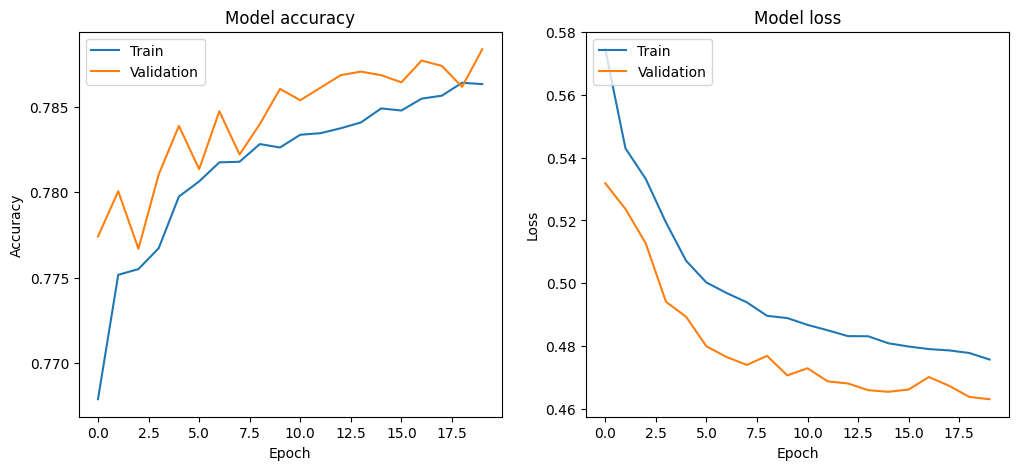

In [58]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu_available))




# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create a Sequential model
model = keras.Sequential()

# Input layer
model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

# Hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))

# Output layer
model.add(layers.Dense(len(y.unique()), activation='softmax'))  # Use softmax for multi-class classification
model.compile(loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
              optimizer='adam',
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)
# Make predictions
y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=-1)

# Evaluate performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print(f'Neural Network Accuracy: {accuracy_nn:.4f}')
print('Confusion Matrix:')
print(conf_matrix_nn)
print('Classification Report:')
print(class_report_nn)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [59]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline # Import Pipeline from imblearn

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Create a pipeline using imblearn's Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE()),  # Apply SMOTE
        ('classifier', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, conf_matrix, class_report

In [60]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Initialize a results dictionary to store outcomes
results = {}

for model_name, model in models.items():
    accuracy, conf_matrix, class_report = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:44:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [63]:
# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpu_available))


def evaluate_neural_network(X_train, y_train, X_test, y_test):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the model
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))  # Update number of classes

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_scaled, y_train, epochs=30, batch_size=32)

    # Predict and evaluate
    y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=-1)

    accuracy = accuracy_score(y_test, y_pred_nn)
    conf_matrix = confusion_matrix(y_test, y_pred_nn)
    class_report = classification_report(y_test, y_pred_nn)

    return accuracy, conf_matrix, class_report

# Evaluate Neural Network
nn_accuracy, nn_conf_matrix, nn_class_report = evaluate_neural_network(X_train, y_train, X_test, y_test)
results['Neural Network'] = {
    'Accuracy': nn_accuracy,
    'Confusion Matrix': nn_conf_matrix,
    'Classification Report': nn_class_report
}


Num GPUs Available:  1
4804/4804 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


In [64]:
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy: {metrics['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n" + "="*50 + "\n")


Logistic Regression Accuracy: 0.5033
Confusion Matrix:
[[ 3836  8028  5399]
 [ 4119 21159 14762]
 [ 7263 36778 52382]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.22      0.24     17263
           1       0.32      0.53      0.40     40040
           2       0.72      0.54      0.62     96423

    accuracy                           0.50    153726
   macro avg       0.43      0.43      0.42    153726
weighted avg       0.56      0.50      0.52    153726



Random Forest Accuracy: 0.5414
Confusion Matrix:
[[ 2648  7316  7299]
 [ 2837 18866 18337]
 [ 4828 29881 61714]]
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.15      0.19     17263
           1       0.34      0.47      0.39     40040
           2       0.71      0.64      0.67     96423

    accuracy                           0.54    153726
   macro avg       0.43      0.42      0.42    153726
weighted avg 

# 5. Model Validation

# 6. Conclusion and Summary